## Automotive Warranty Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [2]:
data = pd.read_excel('/content/DA -Task 2.xlsx')

In [3]:
data.shape

(100, 52)

Dataset Overview

*   Total Records: 100
*   Total Columns: 52
*   Domain : Repair claims data



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [5]:
data.isnull().sum()

,0
VIN,0
TRANSACTION_ID,0
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
REPAIR_DATE,0
CAUSAL_PART_NM,5
GLOBAL_LABOR_CODE_DESCRIPTION,0
PLATFORM,0
BODY_STYLE,0
VPPC,0


In [6]:
unique_counts = data.nunique()
display(unique_counts)

,0
VIN,98
TRANSACTION_ID,32
CORRECTION_VERBATIM,93
CUSTOMER_VERBATIM,100
REPAIR_DATE,29
CAUSAL_PART_NM,18
GLOBAL_LABOR_CODE_DESCRIPTION,4
PLATFORM,11
BODY_STYLE,6
VPPC,26


**COLUMN WISE DETAILED ANALYSIS**

A. Identification Columns
VIN (Vehicle Identification Number)
*   Data Type: String
*   No missing values
*   98 unique VINs

TRANSACTION_ID


*   Data Type : String
*   No missing values
*   32 Unique values



SRC_TXN_ID


*   Data Type : Int
*   No Missing values
*   100 Unique values



B. Free Text Description Columns



CUSTOMER_VERBATIM

*   Data type : string
*   No missing values
*   100 unique values



CORRECTION_VERBATIM
*   Data type : String
*   No missing values
*   90 unique values

C. Temporal Columns

REPAIR_DATE
*   Data Type: Timestamp
*   No missing values
*   100 unique values
*   Range : 2024-01-02 to 2024-02-07



In [7]:
data['REPAIR_DATE'].describe()

,REPAIR_DATE
count,100
mean,2024-01-22 07:26:24
min,2024-01-02 00:00:00
25%,2024-01-12 00:00:00
50%,2024-01-24 12:00:00
75%,2024-02-01 00:00:00
max,2024-02-07 00:00:00


In [8]:
data['REPAIR_AGE'].describe()

,REPAIR_AGE
count,100.000000
mean,14.940000
std,12.367945
min,0.000000
25%,5.000000
50%,12.000000
75%,21.000000
max,50.000000


REPAIR_AGE
*   Data Type: Int
*   No missing values
*   35 distinct values
*   Range : 0 - 50

D. Part & Repair Classification

In [9]:
data['CAUSAL_PART_NM'].value_counts(dropna=False)

,count
CAUSAL_PART_NM,
WHEEL ASM-STRG *JET BLACK,45
WHEEL ASM-STRG *BLACK,12
WHEEL ASM-STRG *VERY DARK AT,7
WHEEL ASM-STRG *BACKEN BLACKK,5
MODULE ASM-STRG WHL HT CONT,5
NaN,5
HARNESS ASM-STRG WHL HORN SW WRG,4
COVER-STRG WHL SPOKE *HI GLOSS V-C,3
WHEEL ASM-STRG * JET BLACK,2


CAUSAL_PART_NM
* Data Type: String
* 5 missing values
* 18 distinct parts
* Top Value: Various steering wheel assemblies

GLOBAL_LABOR_CODE_DESCRIPTION
* Data Type: String (Categorical)
* No missing values
* 4 Unique repair types
* Distribution:
  Steering Wheel Replacement: 78%
  Steering Wheel Spoke Cover Replacement: 11%
  Heated Steering Wheel Module Replacement: 6%
  Horn Switch Wiring Harness Replacement: 5%

In [10]:
data['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts()

,count
GLOBAL_LABOR_CODE_DESCRIPTION,
Steering Wheel Replacement,78
Steering Wheel Spoke Cover Replacement,11
Heated Steering Wheel Module Replacement,6
Steering Wheel Horn Switch Wiring Harness Replacement,5


In [11]:
grouped_data = data.groupby(['CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION'], dropna=False).size().reset_index(name='count')
display(grouped_data)

,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,count
0,APPLIQUE ASM-STRG WHL TR SPOKE CVR *JET BLACK,Steering Wheel Spoke Cover Replacement,1
1,APPLIQUE ASM-STRG WHL TR SPOKE CVR *SYNTHESIS,Steering Wheel Spoke Cover Replacement,2
2,APPLIQUE ASM-STRG WHL TR SPOKE CVR *VULCAN,Steering Wheel Spoke Cover Replacement,2
3,COVER-STRG WHL AIRBAG ACC HOLE *JET BLACK,Steering Wheel Spoke Cover Replacement,1
4,COVER-STRG WHL SPOKE *HI GLOSS V-C,Steering Wheel Spoke Cover Replacement,3
5,COVER-STRG WHL SPOKE *LINEAR GALAXD,Steering Wheel Spoke Cover Replacement,1
6,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,4
7,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,5
8,"WHEEL ASM,STRG",Steering Wheel Replacement,1
9,WHEEL ASM-STRG * JET BLACK,Steering Wheel Replacement,2


GLOBAL_LABOR_CODE
* Data Type: Integer
* No missing Values
* Unique Values: 4 codes (130, 2400, 20, 2320)

In [12]:
data['GLOBAL_LABOR_CODE'].value_counts()

,count
GLOBAL_LABOR_CODE,
130,78
50,11
2400,6
20,5


COMPLAINT_CD & COMPLAINT_CD_CSI
* Data Type: String & Integer
* No missing values
* Unique Values: 7 codes & 1 value (constant 0)
* Significance: complaint codes

In [13]:
data['COMPLAINT_CD'].value_counts()

,count
COMPLAINT_CD,
0-0890,40
0-0310,33
0-0312,12
0-0621,7
0-0313,4
0-0316,2
0-0315,2


E. Vehicle Specification Columns

PLATFORM
* Data Type: String (Categorical)
* No missing values
* Unique Values: 11 platforms
* Top Platform: Full-Size Trucks (52%)
* Distribution: Trucks (52%), Full-Size Utility (13%), Crossover SUV (11%)
* Significance: Vehicle architecture family
*Stakeholder Value: Identify platform-level design issues

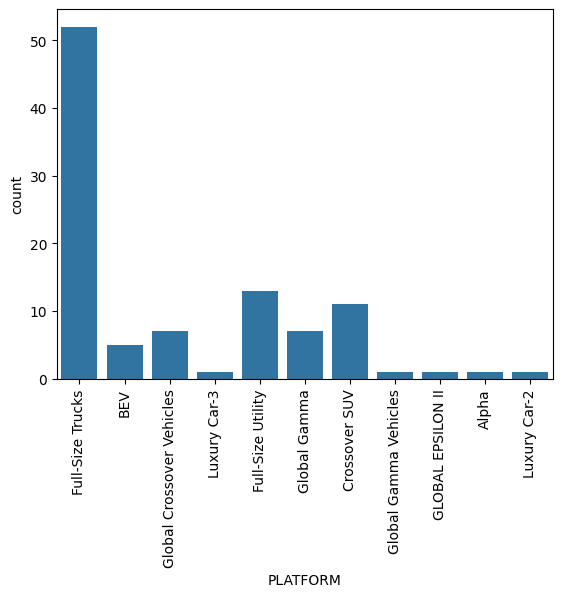

In [14]:
sns.countplot(data=data, x='PLATFORM')
plt.xticks(rotation=90)
plt.show()

BODY_STYLE
* No missing values
* Unique Values: 6 styles
* Significance: Vehicle body configuration
* Stakeholder Value: Manufacturing process correlation, design review

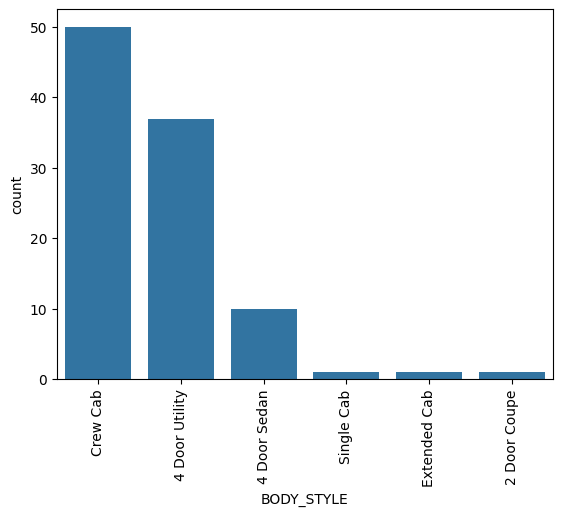

In [15]:
sns.countplot(data=data, x='BODY_STYLE')
plt.xticks(rotation=90)
plt.show()

ENGINE & ENGINE_DESC
* Data Type: String (Code & Description)
* No Missing values
* Unique Values: 12 engine types
* "EN0" = "NONE" for BEV vehicles
* Significance: Engine specification


In [16]:
Enginedata = data.groupby(['ENGINE', 'ENGINE_DESC']).size().reset_index(name='count')
Enginedata

,ENGINE,ENGINE_DESC,count
0,EN0,NONE,12
1,L5P,"DIESEL, 8 CYL, 6.6L, DI, V8, TURBO, DURAMAX, G...",9
2,L84,"GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5",24
3,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",17
4,L8T,"GAS, 8 CYL, 6.6L, SIDI, VVT, CAST IRON",4
5,LFY,"GAS, 6 CYL, V6, 3.6L, SIDI, DOHC, ATSS, GEN 1+",5
6,LGX,"GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2",11
7,LM2,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",7
8,LSY,"GAS, 4 CYL, L4, 2.0L, SIDI, DOHC, VVT, ALUM, T...",5
9,LT1,"GAS, 8 CYL, 6.2L, DI, AFM, VVT, HO, ALUM, GMNA",1


TRANSMISSION & TRANSMISSION_DESC
* Data Type: String (Code & Description)
* No missing values
* Unique Values: 19 transmission types
* "MF1" = "NONE" for BEV vehicles
* Significance: Transmission specification


In [17]:
Enginedata = data.groupby(['TRANSMISSION', 'TRANSMISSION_DESC']).size().reset_index(name='count')
Enginedata

,TRANSMISSION,TRANSMISSION_DESC,count
0,M3G,"BYT 9 SPD, 9T60, ETRS GEN 1",1
1,M3H,"BYT 9 SPD, 9T50, ETRS GEN 1",1
2,M3T,"EU:N:X:Z|TRANSMISSION BYT 9 SPD, 9T60, GEN 1",1
3,M3V,"BYT 9 SPD, 9T65, GEN 1",4
4,M3W,"TRANSMISSION BYT 9 SPD, 9T65, ETRS GEN 1",12
5,M5N,"BYT 8 SPD, 8L45, BAS+",1
6,MF1,NONE,5
7,MGM,"BYT 10 SPD, 10R1000, GRX, GEN 1, VAR 1",9
8,MH8,"BYT 6 SPD, HMD, X23F",1
9,MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",28


VPPC
* Data Type: String
* No missing values
* Unique Values: 26 codes

LINE_SERIES
* Data Type: String
* 1 missing value
* Unique Values: 22


VIN_MODL_DESGTR
* Data Type: String
* No missing values
* Unique Values: 41 values
* Significance: Model code


F. Manufacturing & Build Information

PLANT
* Data Type: String (3-letter code)
* 1 missing value
* Unique Values: 11 plants
* Significance: Manufacturing facility


In [18]:
data['PLANT'].value_counts(dropna=False)

,count
PLANT,
SIL,19
FTW,17
SHT,15
ARL,13
FLT,11
ORI,8
DEL,5
OS2,4
RAM,3


STATE
* Data Type: String
* 2 missing values
* Unique Values: 39 US states
* Significance: US state of repair location

DEALER_REGION & SALES_REGION_CODE
* Data Type: Integer
* No missing values
* Unique Values: 2 values each (1, 4)
* Range: 1-4
* Significance: Regional classification for dealers and sales

In [19]:
Dealerdata = data.groupby(['DEALER_REGION', 'SALES_REGION_CODE']).size().reset_index(name='count')
Dealerdata

,DEALER_REGION,SALES_REGION_CODE,count
0,1,1,97
1,4,4,3


REPAIR_DLR_POSTAL_CD
* Data Type: Integer
* 2 missing values
* Unique Values: 92 unique codes
* Significance: Zip/postal code of repair location

H. Cost & Financial Columns

In [20]:
data['REPORTING_COST'].describe()

,REPORTING_COST
count,100.000000
mean,531.193200
std,411.161608
min,27.690000
25%,305.432500
50%,433.970000
75%,554.062500
max,2457.450000


REPORTING_COST
* Data Type: Float
* No missing values
* Range: 27.69 - 2,457.45
* Mean: $531.19
* Significance: Cost reported for warranty claim

In [21]:
data['TOTALCOST'].describe()

,TOTALCOST
count,94.000000
mean,561.162128
std,452.796836
min,27.690000
25%,320.105000
50%,457.225000
75%,606.905000
max,3205.450000


TOTALCOST
* Data Type: Float
* 6 missing values
* Range: 27.69 - 3,205.45
* Mean: 561.16
* Significance: Total repair cost

In [22]:
data['LBRCOST'].describe()

,LBRCOST
count,100.000000
mean,106.344900
std,113.223074
min,20.000000
25%,61.855000
50%,78.560000
75%,108.055000
max,1012.670000


LBRCOST
* Data Type: Float
* No missing values
* Range: 20.00 - 1,012.67
* Mean: 106.34
* Significance: Labor cost

I. Usage Columns

In [23]:
data['KM'].describe()

,KM
count,100.000000
mean,24914.230000
std,20747.078206
min,3.000000
25%,8883.250000
50%,21962.000000
75%,35493.250000
max,107905.000000


KM (Kilometers)
* Data Type: Integer
* Completeness: 100%
* Range: 3 to 107,905 km
* Mean: 24,914 km
* Significance: Vehicle KMs driven at the time of repair

J. Regulatory & Compliance Columns


VEH_TEST_GRP
* Data Type: String
* 2 missing values
* Unique Values: 23 test groups

COUNTRY_SALE_ISO
* Data Type: String
* Completeness: 100%
* Unique Values: 6 countries
* Significance: Country where vehicle was sold

OPTN_FAMLY_CERTIFICATION
* Data Type: String
* Completeness: 10 missing values
* Unique Values: 3 codes


OPTF_FAMLY_EMISSIOF_SYSTEM
* Data Type: String
* Completeness: 5 missing values
* Unique Values: 8 systems

In [24]:
data['ORD_SELLING_SRC_CD'].describe()

,ORD_SELLING_SRC_CD
count,100.000000
mean,24.590000
std,17.822976
min,11.000000
25%,13.000000
50%,13.000000
75%,48.000000
max,72.000000


ORD_SELLING_SRC_CD
* Data Type: Integer
* No missing values
* Unique Values: 7 codes
* Range: 11 to 72

In [25]:
data['LAST_KNOWN_DELVRY_TYPE_CD'].value_counts(dropna = False)

,count
LAST_KNOWN_DELVRY_TYPE_CD,
10.0,59
18.0,11
16.0,8
15.0,6
21.0,4
37.0,3
23.0,3
NaN,2
34.0,1


LAST_KNOWN_DELVRY_TYPE_CD
* Data Type: Integer
* Completeness: 2 missing values
* Unique Values: 11 delivery types
* Significance: How vehicle was delivered to customer

K. System Columns

TRANSACTION_CATEGORY
* Data Type: String
* No missing values
* Unique Values: 2 categories
* Significance: Transaction classification

In [26]:
data['TRANSACTION_CATEGORY'].value_counts()

,count
TRANSACTION_CATEGORY,
FREG,89
FREG_POL,11


SRC_VER_NBR
* Data Type: Integer
* No missing values
* Unique Values: 10 versions

TRANSACTION_CNTR
* Data Type: Integer
* No missing values
* Unique Values: 1
* Significance: Transaction account

In [27]:
data['MEDIA_FLAG'].value_counts()

,count
MEDIA_FLAG,
N,62
Y,38


MEDIA_FLAG
* Data Type: String
* No missing values
* Unique Values: 2 values
* Significance: Indicates if media attached

In [28]:
data['NON_CAUSAL_PART_QTY'].value_counts()

,count
NON_CAUSAL_PART_QTY,
0,93
1,7


NON_CAUSAL_PART_QTY
* Data Type: Integer
* No Missing values
* Unique Values: 2 values
* Significance: If non casual part is used

# *Data Cleaning*

Replace None to No Engine_DESC in ENGINE and TRANSMISSION_DESC

In [29]:
data['ENGINE_DESC'] = data['ENGINE_DESC'].replace('NONE', 'No engine')

In [30]:
data['TRANSMISSION_DESC'] = data['TRANSMISSION_DESC'].replace('NONE', 'No engine')

In [31]:
cols = ['ENGINE_DESC','TRANSMISSION_DESC']
for i in cols:
  print(data[i].isnull().sum())

0
0


CAUSAL_PART_NM column has null values but when we look at the GLOBAL_LABOR_CODE_DESCRIPTION the replacement part used for the particular repair was mentioned.

In [32]:
data['CASUAL_PART'] = data['GLOBAL_LABOR_CODE_DESCRIPTION'].str.replace('Replacement', '')

State has 2 missing values.Fill the missing values using mode

In [33]:
data['STATE'].fillna(data['STATE'].mode()[0], inplace=True)

/tmp/ipython-input-2138785523.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['STATE'].fillna(data['STATE'].mode()[0], inplace=True)


In [34]:
data['STATE'].isnull().sum()

np.int64(0)

Missing values in TotalCost Column , So REPORTING_COST is considered for analysis

In [35]:
duplicated_vin_values = data['VIN'][data['VIN'].duplicated(keep=False)].unique()
display(duplicated_vin_values)

array(['1HRFFHEL8RZ133325', '3HRS9EED0LH255650'], dtype=object)

In [36]:
data.sample(5)

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,CASUAL_PART
67,1HNSKDKD4NR281286,13035,replaced loose applique,8 INFO: INFORMATION Customer states vehicle st...,2024-01-31,APPLIQUE ASM-STRG WHL TR SPOKE CVR *SYNTHESIS,Steering Wheel Spoke Cover Replacement,Full-Size Utility,4 Door Utility,T1YCF,...,2820191899,2,1,N,CF10906,1500,10.0,0,1,Steering Wheel Spoke Cover
40,1HCFDEER5NZ580922,13026,tech 573 Replaced heated steering wheel module,HEATED STEERING WHEEL INOP,2024-01-17,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2809492491,2,1,N,CF10543,1500,16.0,0,1,Heated Steering Wheel Module
55,3HCFYHED7NH206711,13034,REPLACED STEERING WHEEL AND RETESTED OPERATION...,CUSTOMER STATES THAT THE CRUISE CONTROL IS NOT...,2024-01-26,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2820202794,4,1,N,CF18543,1500,10.0,0,1,Steering Wheel
73,3HCFDHEL2SH305075,13038,方向盘底部的皮革脱落了。拆下方向盘并更换新的。CC：0890 FC：2039PRA#4904...,LEATHER ON STEERING WHEEL COMING LOOSE ON BOTTOM.,2024-01-31,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2820191222,4,1,N,CF10543,1500,18.0,0,1,Steering Wheel
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,2820879999,6,1,N,CC20943,2500,14.0,0,1,Steering Wheel


Checking for OutLiers in Reporting Cost , LBR cost & KM

In [37]:
Outlier_columns = ['REPORTING_COST', 'LBRCOST', 'KM','REPAIR_AGE']

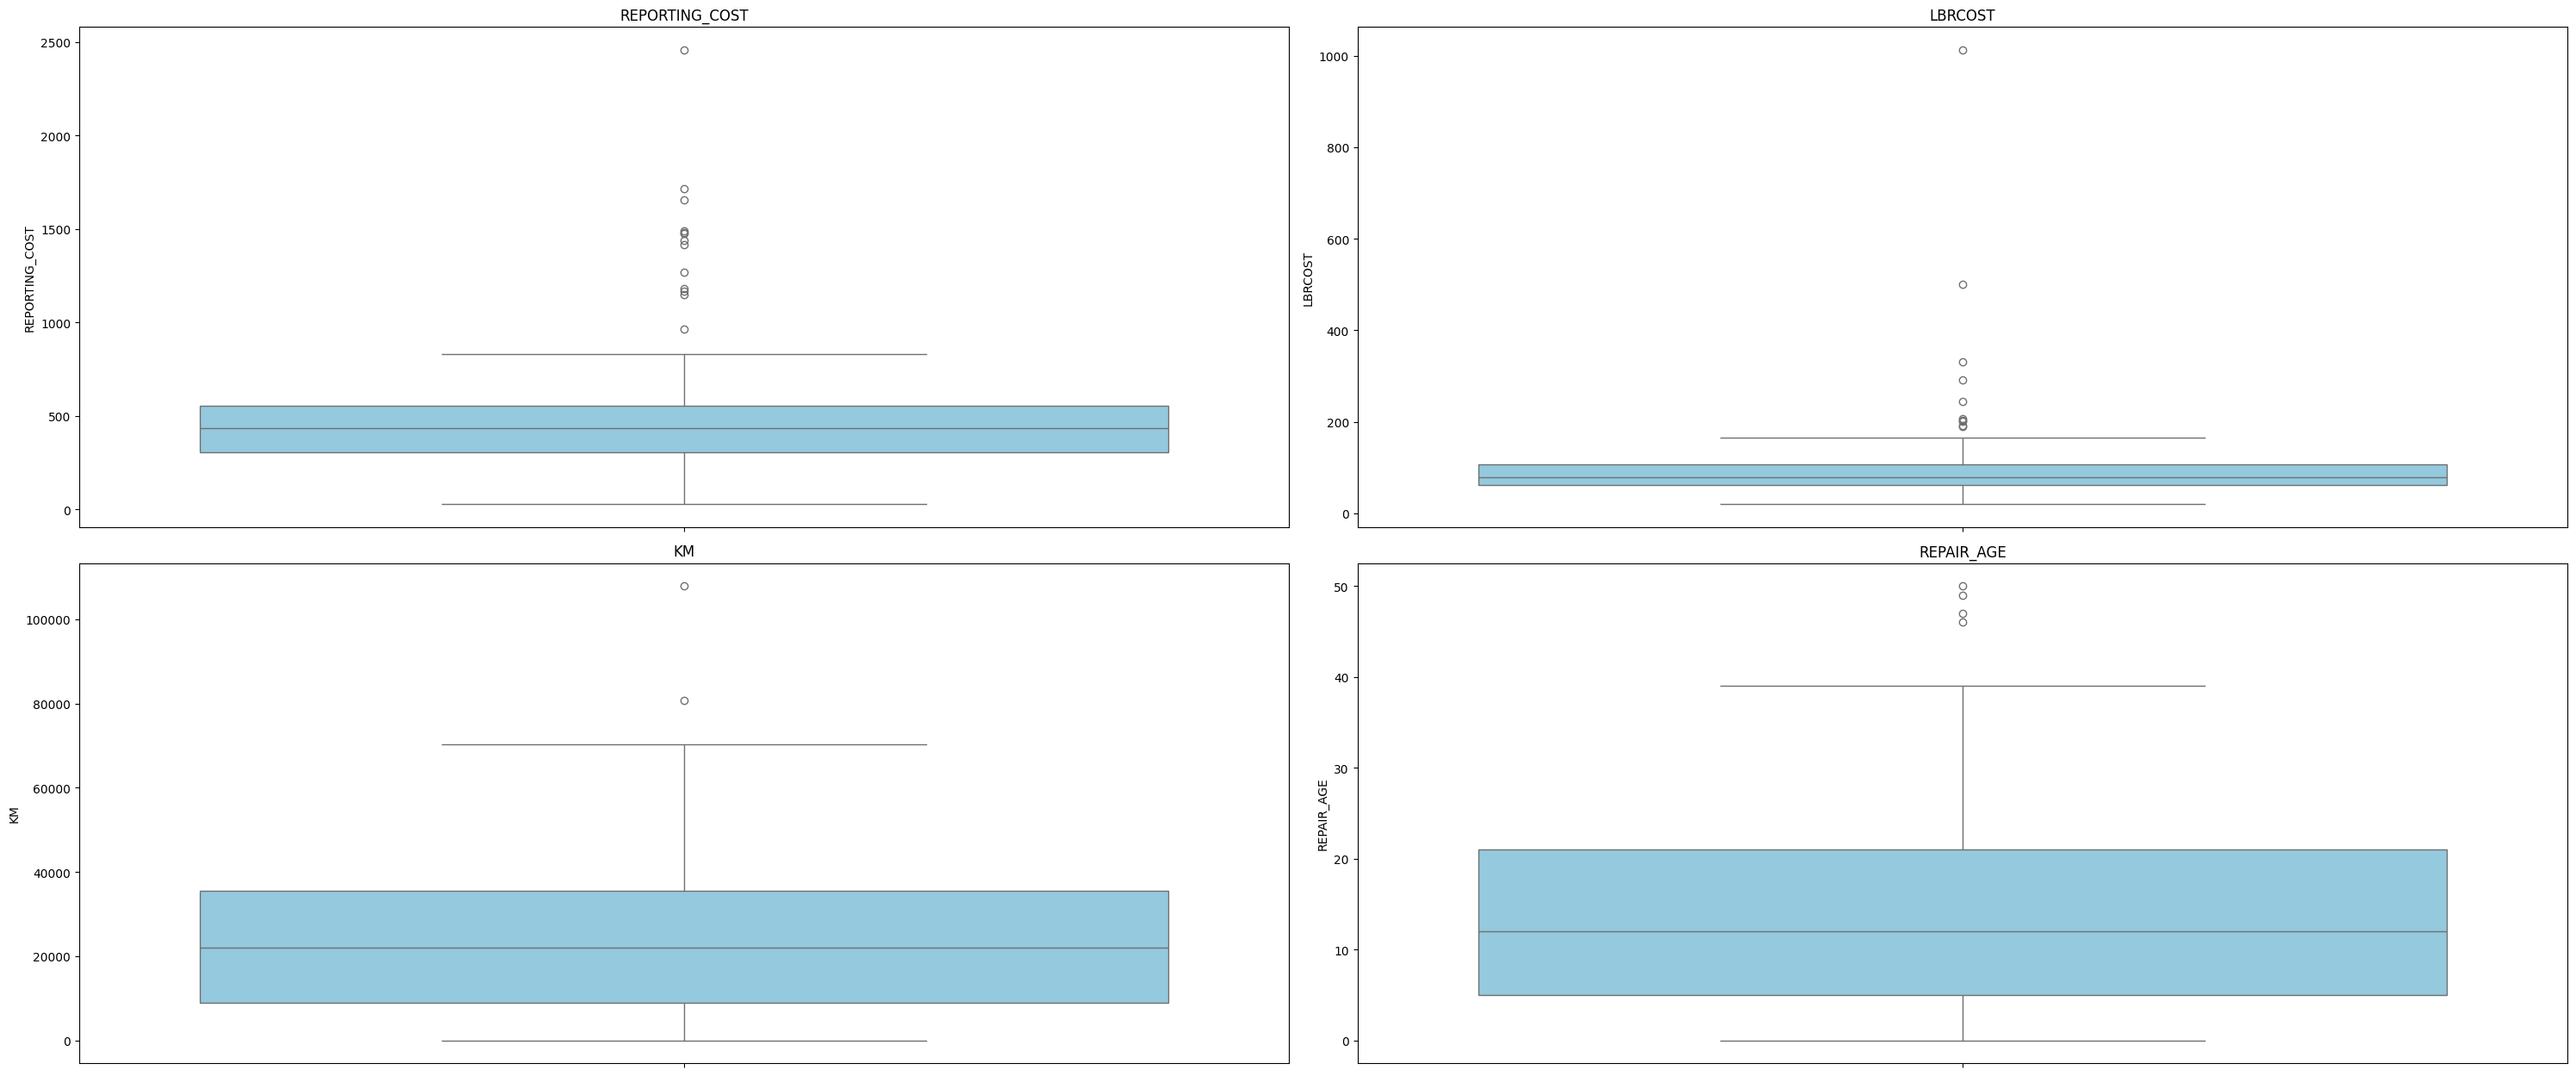

In [38]:
plt.figure(figsize=(30, 25))

# Loop and plot
for i, col in enumerate(Outlier_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [39]:
data['KM'].describe()


,KM
count,100.000000
mean,24914.230000
std,20747.078206
min,3.000000
25%,8883.250000
50%,21962.000000
75%,35493.250000
max,107905.000000


In [40]:
Q1 = data['KM'].quantile(0.25)
Q3 = data['KM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Outlier_treated_KM'] = np.where(data['KM'] > upper_bound, upper_bound, data['KM'])

<Axes: ylabel='Outlier_treated_KM'>

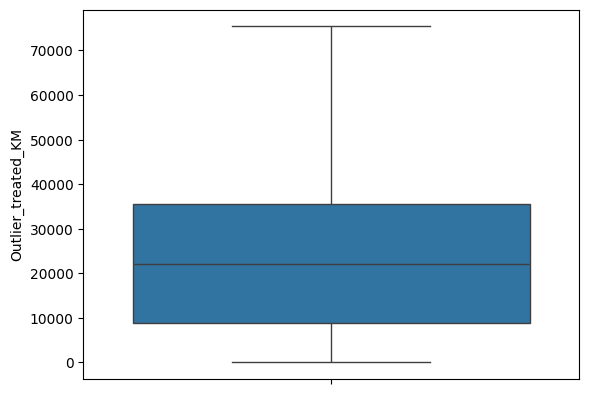

In [41]:
sns.boxplot(y=data['Outlier_treated_KM'])

In [42]:
data['REPAIR_AGE'].describe()

,REPAIR_AGE
count,100.000000
mean,14.940000
std,12.367945
min,0.000000
25%,5.000000
50%,12.000000
75%,21.000000
max,50.000000


In [43]:
Q1 = data['REPAIR_AGE'].quantile(0.25)
Q3 = data['REPAIR_AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['outlier_treated_AGE'] = np.where(data['REPAIR_AGE'] > upper_bound, upper_bound, data['REPAIR_AGE'])

<Axes: ylabel='outlier_treated_AGE'>

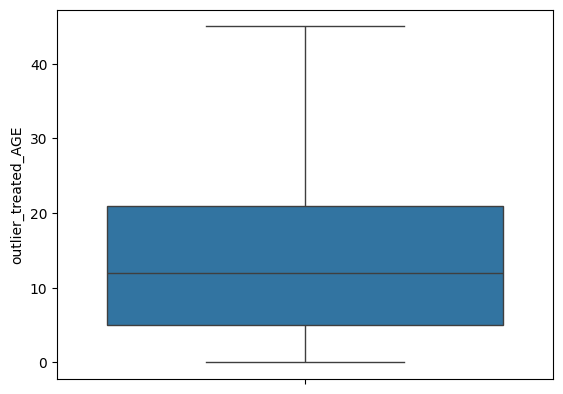

In [44]:
sns.boxplot(y=data['outlier_treated_AGE'])

In [45]:
Q1 = data['REPORTING_COST'].quantile(0.25)
Q3 = data['REPORTING_COST'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Outlier_treated_COST'] = np.where(data['REPORTING_COST'] > upper_bound, upper_bound, data['REPORTING_COST'])

<Axes: ylabel='Outlier_treated_COST'>

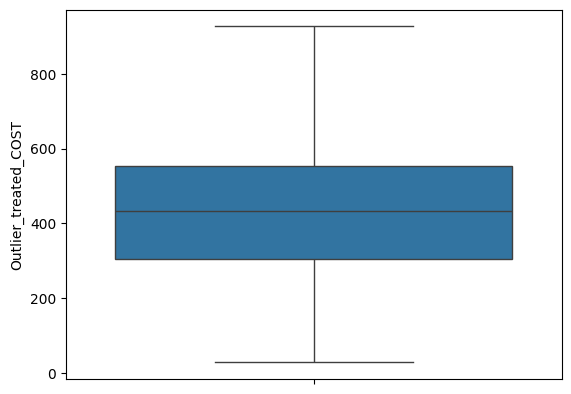

In [46]:
sns.boxplot(y=data['Outlier_treated_COST'])

In [47]:
Q1 = data['LBRCOST'].quantile(0.25)
Q3 = data['LBRCOST'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Outlier_treated_LBRCOST'] = np.where(data['LBRCOST'] > upper_bound, upper_bound, data['LBRCOST'])

<Axes: ylabel='Outlier_treated_LBRCOST'>

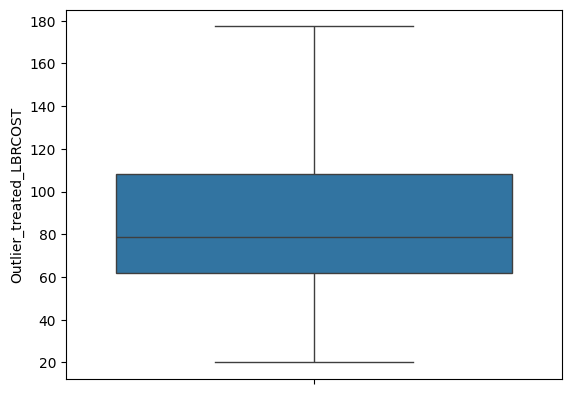

In [48]:
sns.boxplot(y=data['Outlier_treated_LBRCOST'])

In [53]:
def ComplaintType(text):


    text = text.lower()

    heat_keywords = ["heat", "warm", "luke warm", "lukewarm", "inop", "smoking"]
    if any(word in text for word in heat_keywords):
        return "heating issue"

    material_keywords = [
        "peel", "bubbl", "fray", "crack", "stitch",
        "leather", "coming apart", "loose", "delam",
        "wrinkle", "trim", "finish", "material"
    ]
    if any(word in text for word in material_keywords):
        return "Material Damage"

    assist_keywords = ["super cruise", "driver assist", "cruise control", "lane"]
    if any(word in text for word in assist_keywords):
        return "Driver Assist Failure"

    horn_keywords = ["horn", "switch", "button", "control"]
    if any(word in text for word in horn_keywords):
        return "Horn"

    noise_keywords = ["noise", "rattl", "rub", "click", "tight"]
    if any(word in text for word in noise_keywords):
        return "Steering Noise"

    if "smok" in text:
        return  "Safety Issue"

    return "Others"

data['COMPLAINT_TYPE'] = data['CUSTOMER_VERBATIM'].apply(ComplaintType)

data['COMPLAINT_TYPE'].value_counts()

,count
COMPLAINT_TYPE,
Material Damage,43
heating issue,27
Others,15
Driver Assist Failure,7
Steering Noise,4
Horn,4


In [64]:
CostData = data.groupby(['REPAIR_DATE']).agg({'REPORTING_COST': 'sum'}).reset_index()
CostData

,REPAIR_DATE,REPORTING_COST
0,2024-01-02,370.03
1,2024-01-03,307.32
2,2024-01-04,2902.73
3,2024-01-05,3572.42
4,2024-01-08,27.69
5,2024-01-09,1623.25
6,2024-01-10,2362.56
7,2024-01-11,1955.72
8,2024-01-12,2644.93
9,2024-01-15,2061.78


In [65]:
px.line(CostData, x='REPAIR_DATE', y='REPORTING_COST', title='Total Reporting Cost Trend by Repair Month')

In [60]:
fig = px.scatter(data, x='REPAIR_AGE', y='REPORTING_COST', title='Repair Age vs. Reporting Cost')
fig.show()

In [66]:
px.pie(data, names='PLATFORM', title='Platform Distribution')

In [93]:
grouped_cost_data = data.groupby(['PLANT','COMPLAINT_TYPE']).agg({'REPORTING_COST': 'sum'}).reset_index()
fig = px.bar(grouped_cost_data, x='PLANT', y='REPORTING_COST', color='COMPLAINT_TYPE',
             title='Total Reporting Cost by Country and Complaint Type')
fig.show()

In [79]:
px.bar(data.groupby('COUNTRY_SALE_ISO')['REPORTING_COST'].mean().reset_index(), x='COUNTRY_SALE_ISO',y='REPORTING_COST', title='Average Reporting Cost by Country')

In [80]:
Partcost = data.groupby('CASUAL_PART').agg({'REPORTING_COST': 'sum'}).reset_index()
px.bar(Partcost, x='CASUAL_PART',y='REPORTING_COST', title='Reporting Cost by Casual Part')

# TOP 5 COLUMNS

1. REPAIR_AGE
* Directly tied to warranty costs and customer satisfaction
* Early failures (0-6 months): 25% of cases - indicates manufacturing quality issues


---
2. REPORTING_COST
* Direct financial impact: 531 Dollars average per claim
* Wide range ($27-$2,457) indicates varying repair complexity
* It significantly impacts P&L


---
3. PLATFORM
* Full-Size Trucks = 52% of all issues
* Strategic resource allocation for highest-impact fixes



---
4. GLOBAL_LABOR_CODE_DESCRIPTION
* 78% are full steering wheel replacements
* Indicates part-level failures




---
5. COUNTRY_BY_ISO
* Most of the high cost repair claims are from mexico








# TAG GENERATION

Failure Mode Tags Extracted
* Driver Assist Failure includes loss of cruise control,driver assist
* Horn includes sounds like Squeaks, rattles, clicks
* Material Damage	 includes Physical separation/adhesive failures
* Steering Noise	includes unusual sounds from steering
* heating issue	includes Heated steering wheel malfunctions

# KEY INSIGHTS & RECOMMENDATION

* Steering wheel is the dominant failure mode, with 78% requiring complete wheel
replacement. This indicates a manufacturing quality issue rather than wear-and-tear.
* Mean repair cost of 531 x 100 cases = $53,100 in this sample alone which cloud make a affect in the P&L
* 25% of failures occur within 6 months of vehicle delivery cost more to fix due to expedited parts and customer dissatisfaction.
* Full-Size Trucks dominate at 52% - given their high transaction prices and profit margins, quality issues here have outsized business impact.



---

Actionable Recommendations

* Immediate: Audit steering wheel supplier quality for Full-Size Truck platform
* Short-term: Implement enhanced adhesive Quality checks at SIL and SHT plants
* Mid-term: Steering wheel design review focusing on material selection and assembly process
